In [170]:
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [171]:
import pandas as pd
import numpy as np

In [172]:
df=pd.read_csv('final_data.csv')
df.head()

,Unnamed: 0,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity,identity,isAlive
0,0,Viserys II Targaryen,1,NaN,House Targaryen,0,0,0,0,0,0,0,NaN,11,1,0.605351,king,0
1,1,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,0.896321,knight,1
2,2,Addison Hill,1,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0,0.267559,lord,1
3,3,Aemma Arryn,0,Valyrian,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0.183946,official,0
4,4,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0,0.043478,noble,1


In [173]:
house_dummy=pd.get_dummies(df['house'],prefix='house')
df[house_dummy.columns]=house_dummy[:]
culture_dummy=pd.get_dummies(df['culture'],prefix='culture')
df[culture_dummy.columns]=culture_dummy[:]
identity_dummy=pd.get_dummies(df['identity'],prefix='identity')
df[identity_dummy.columns]=identity_dummy[:]
df.head()

,Unnamed: 0,name,male,culture,house,book1,book2,book3,book4,book5,...,identity_king,identity_knight,identity_lord,identity_magician,identity_noble,identity_official,identity_prince,identity_smallfolk,identity_smallfork,identity_warrior
0,0,Viserys II Targaryen,1,NaN,House Targaryen,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,2,Addison Hill,1,NaN,House Swyft,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,Aemma Arryn,0,Valyrian,House Arryn,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [174]:
df.columns

Index(['Unnamed: 0', 'name', 'male', 'culture', 'house', 'book1', 'book2',
       'book3', 'book4', 'book5',
       ...
       'identity_king', 'identity_knight', 'identity_lord',
       'identity_magician', 'identity_noble', 'identity_official',
       'identity_prince', 'identity_smallfolk', 'identity_smallfork',
       'identity_warrior'],
      dtype='object', length=393)

In [175]:
del df['identity_lord']
del df['boolDeadRelations']
del df['isNoble']
del df['name']
del df['Unnamed: 0']
del df['culture']
del df['house']
del df['identity']
del df['age']

In [176]:
df.shape

(1946, 384)

<h1>Decision Tree<h1>

In [185]:
def cross_validation(model,X,y,folds):
    K=len(folds)
    accuracy_performance=np.zeros(10)
    test_performance=np.zeros(10)
    for idx in range(K):
        train,test=folds[idx]
        X_train=X.iloc[train]
        y_train=y.iloc[train]
        X_test=X.iloc[test]
        y_test=y.iloc[test]
        model.fit(X_train,y_train)
        test_performance[idx]=accuracy_score(y_test, model.predict(X_test))
    return test_performance

In [186]:
kf=KFold(10,shuffle=True)
folds=list(kf.split(df))

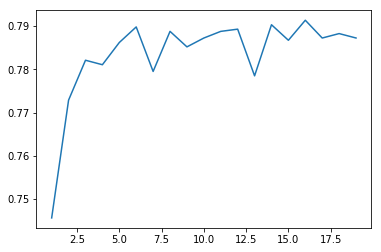

In [187]:
performance=np.repeat(0.0,19)
for k in range(1,20):
    decision_tree_model = tree.DecisionTreeClassifier(max_depth=k)
    avg_performance=np.mean(cross_validation(decision_tree_model,df.drop(columns=['isAlive']),df[['isAlive']],folds))
    performance[k-1]=avg_performance
outcomes=np.arange(1,20)
plt.plot(outcomes,performance)

In [200]:
train, test = train_test_split(df)
x_train = train.drop(columns=['isAlive'])
y_train = train[['isAlive']]
x_test = test.drop(columns=['isAlive'])
y_test = test[['isAlive']]
decision_tree_model = tree.DecisionTreeClassifier(max_depth=10)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [201]:
accuracy_score(y_test, decision_tree_model.predict(x_test))

0.7926078028747433

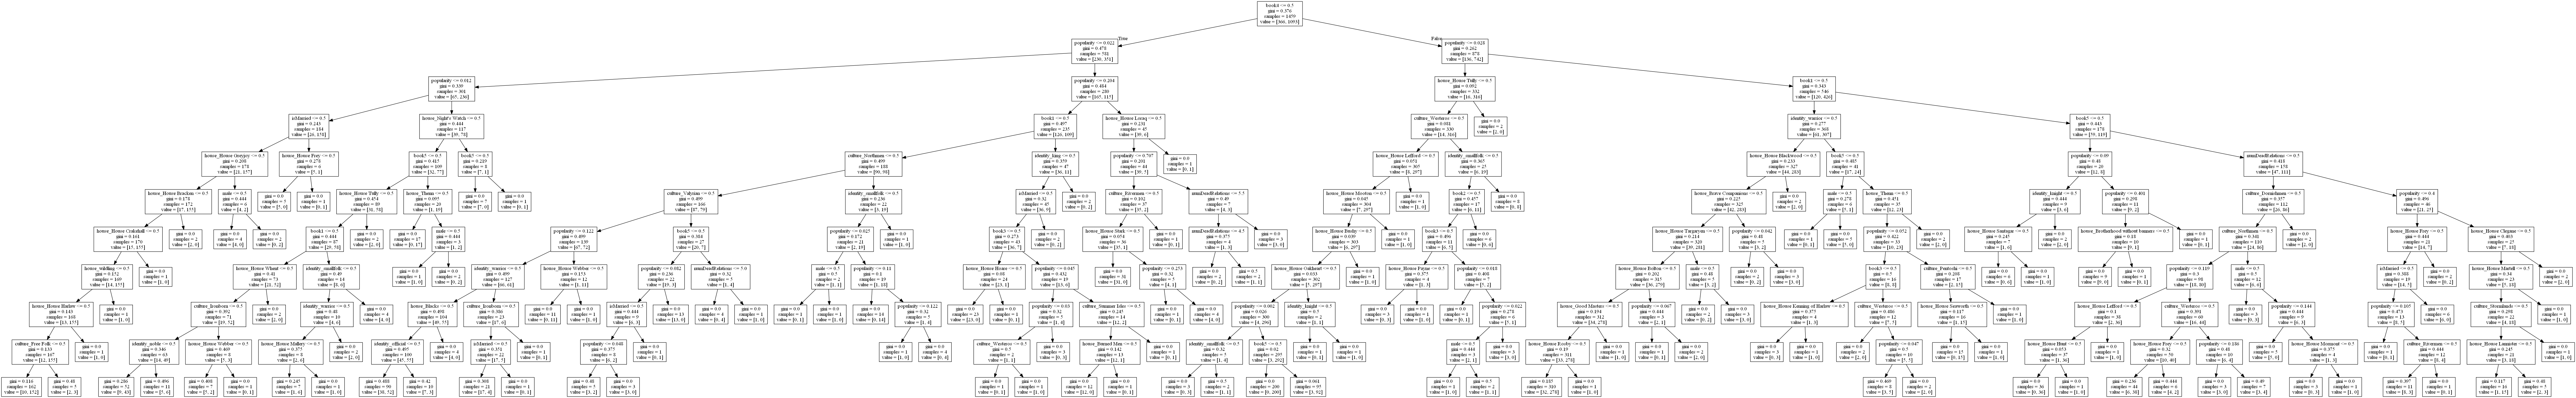

In [203]:
feature_names = [key for key in df if not key=='isAlive']
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree_model, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())


<h1>Random Forrest<h1>

In [204]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
RFC_model.fit(x_train,y_train)
accuracy_score(y_test, RFC_model.predict(x_test))

C:\Users\24562\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7926078028747433

<h1>SVM<h1>

In [205]:
from sklearn.svm import SVC

In [206]:
train, test = train_test_split(df)
x_train = train.drop(columns=['isAlive'])
y_train = train[['isAlive']]
x_test = test.drop(columns=['isAlive'])
y_test = test[['isAlive']]
performance=np.repeat(0.0,50)
k=0
for c in np.arange(2,102,2):
    SVM_model = SVC(kernel='rbf',C=c)
    SVM_model.fit(x_train,y_train)
    performance[k]=accuracy_score(y_test, SVM_model.predict(x_test))
    k+=1

C:\Users\24562\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


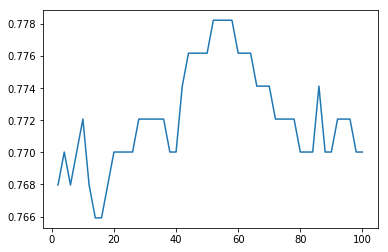

In [207]:
outcomes=np.arange(2,102,2)
plt.plot(outcomes,performance)

In [210]:
SVM_model = SVC(kernel='rbf',C=60)
SVM_model.fit(x_train,y_train)
accuracy_score(y_test, SVM_model.predict(x_test))

C:\Users\24562\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7761806981519507

In [211]:
confusion_matrix(y_test,SVM_model.predict(x_test))

array([[ 21, 101],
       [  8, 357]], dtype=int64)